In [11]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd

In [12]:
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cmocean

In [13]:
plt.style.use('seaborn-pastel')

In [14]:
dataset = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_baseline_ensemble1_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [15]:
dataset = (r'/Volumes/UnionSine/data_transfer/ssp126/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data_oae = xr.open_dataset(dataset)

In [16]:
sliced_data_baseline = data.where((-25 < data.nav_lon) & (data.nav_lon < 10) & (35 < data.nav_lat) & (data.nav_lat < 70), drop=True)
sliced_frame_baseline = sliced_data_baseline.sel(time_counter=slice('2090', '2100'))

In [17]:
sliced_data_oae = data_oae.where((-25 < data_oae.nav_lon) & (data_oae.nav_lon < 10) & (35 < data_oae.nav_lat) & (data_oae.nav_lat < 70), drop=True)
sliced_frame_oae = sliced_data_oae.sel(time_counter=slice('2090', '2100'))

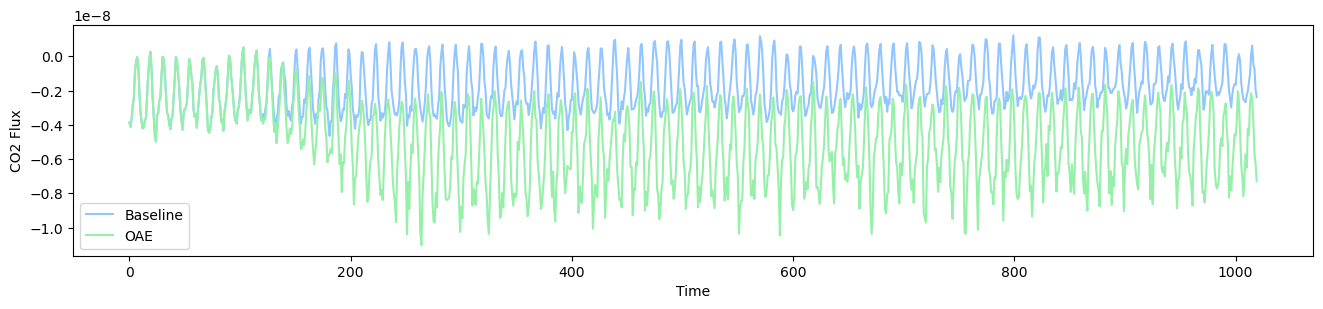

In [41]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_data_baseline.co2flux_cpl.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_data_oae.co2flux_cpl.mean(dim=('y', 'x')), label = 'OAE')
plt.xlabel("Time")
plt.ylabel("CO2 Flux")
plt.legend()
plt.show()

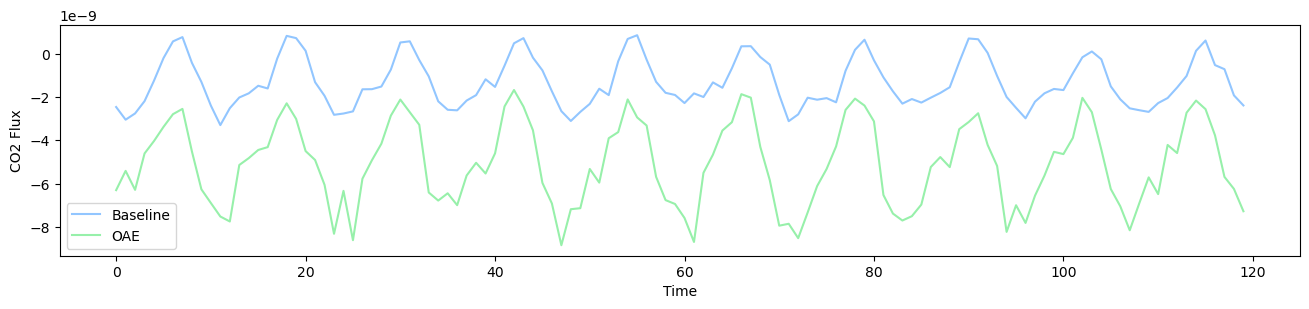

In [42]:
plt.figure(figsize=(16, 3))
plt.plot(sliced_frame_baseline.co2flux_cpl.mean(dim=('y', 'x')), label = 'Baseline')
plt.plot(sliced_frame_oae.co2flux_cpl.mean(dim=('y', 'x')), label = 'OAE')
plt.xlabel("Time")
plt.ylabel("CO2 Flux")
plt.legend()
plt.show()

In [20]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_baseline = sliced_data_baseline["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [21]:
co2flux_season_summary_baseline = co2_flux_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_baseline = co2_flux_baseline.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_baseline = co2flux_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [22]:
start_date = "2090-01-01"
end_date = "2100-01-01"

co2_flux_oae = sliced_data_oae["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [23]:
co2flux_season_summary_oae = co2_flux_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
co2flux_season_mean_all_years_oae = co2_flux_oae.resample(time_counter='QS-DEC', keep_attrs=True).mean()
co2flux_seasonal_mean_oae = co2flux_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [24]:
plt.style.use('seaborn-pastel')

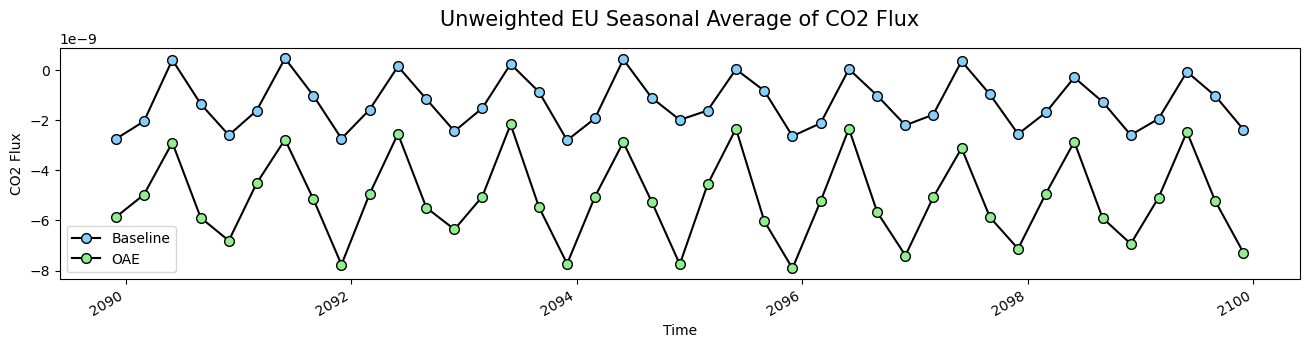

In [39]:
f, ax = plt.subplots(figsize=(16, 3))

co2flux_seasonal_mean_baseline.plot(marker="o",
                        color="black",
                        markerfacecolor="lightskyblue", markersize=7,
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_seasonal_mean_oae.plot(marker="o",
                        color="black", markersize=7,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of CO2 Flux", fontsize= 15, y=1.06)

plt.xlabel("Time")
plt.ylabel("CO2 Flux")
plt.legend()
plt.show()

In [26]:
month_length_baseline = co2_flux_baseline.time_counter.dt.days_in_month
co2flux_weighted_mean_baseline = ((co2_flux_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_baseline = co2flux_weighted_mean_baseline.where(co2flux_weighted_mean_baseline)
co2flux_weighted_season_baseline = co2flux_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [27]:
month_length_oae = co2_flux_oae.time_counter.dt.days_in_month
co2flux_weighted_mean_oae = ((co2_flux_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
co2flux_weighted_mean_oae = co2flux_weighted_mean_oae.where(co2flux_weighted_mean_oae)
co2flux_weighted_season_oae = co2flux_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

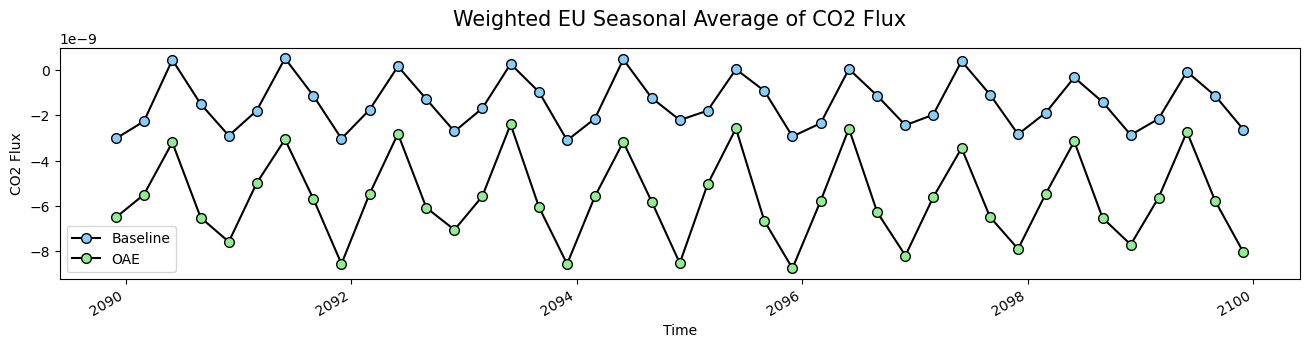

In [40]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(16, 3))
co2flux_weighted_season_baseline.plot(marker="o", markersize=7,
                        color="black",
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

co2flux_weighted_season_oae.plot(marker="o", markersize=7,
                        color="black",
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)

plt.xlabel("Time")
plt.ylabel("CO2 Flux")
plt.legend()
plt.show()

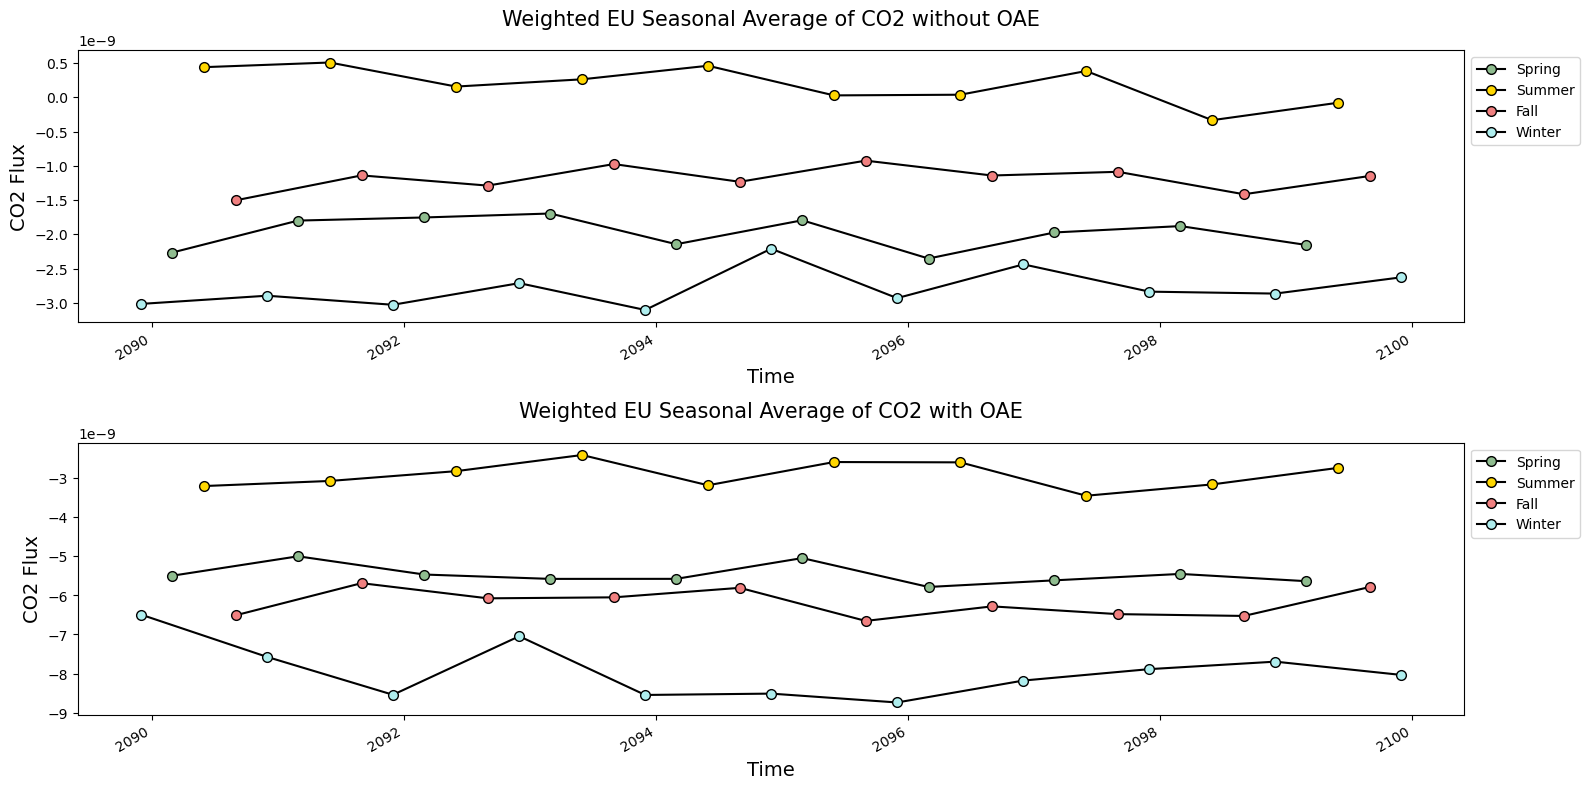

In [29]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharey=False)
for month, arr in co2flux_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black",
             marker="o", markersize=7,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=15, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('CO2 Flux', fontsize=14)

for month, arr in co2flux_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black",
             marker="o", markersize=7,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=15, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('CO2 Flux', fontsize=14)
f.tight_layout()
plt.show()

In [44]:
co2flux_weighted_baseline = co2flux_weighted_season_baseline.to_dataframe('CO2_Flux')
co2flux_weighted_baseline['Month'] = pd.DatetimeIndex(co2flux_weighted_baseline.index).month

In [45]:
conditions = [
    (co2flux_weighted_baseline['Month'] == 3),
    (co2flux_weighted_baseline['Month'] == 6),
    (co2flux_weighted_baseline['Month'] == 9),
    (co2flux_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_baseline['Month'] = np.select(conditions, values)

In [46]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of CO2 Flux without OAE')

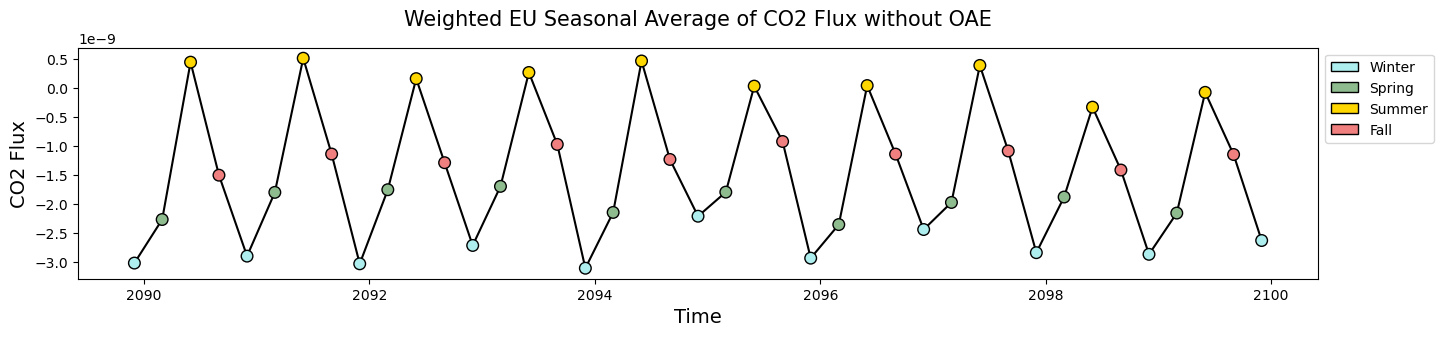

In [47]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux without OAE", fontsize=15, y=1.06)

In [34]:
co2flux_weighted_oae = co2flux_weighted_season_oae.to_dataframe('CO2_Flux')
co2flux_weighted_oae['Month'] = pd.DatetimeIndex(co2flux_weighted_oae.index).month

In [35]:
conditions = [
    (co2flux_weighted_oae['Month'] == 3),
    (co2flux_weighted_oae['Month'] == 6),
    (co2flux_weighted_oae['Month'] == 9),
    (co2flux_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

co2flux_weighted_oae['Month'] = np.select(conditions, values)

In [36]:
colors = dict(zip(co2flux_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

Text(0.5, 1.06, 'Weighted EU Seasonal Average of CO2 Flux with OAE')

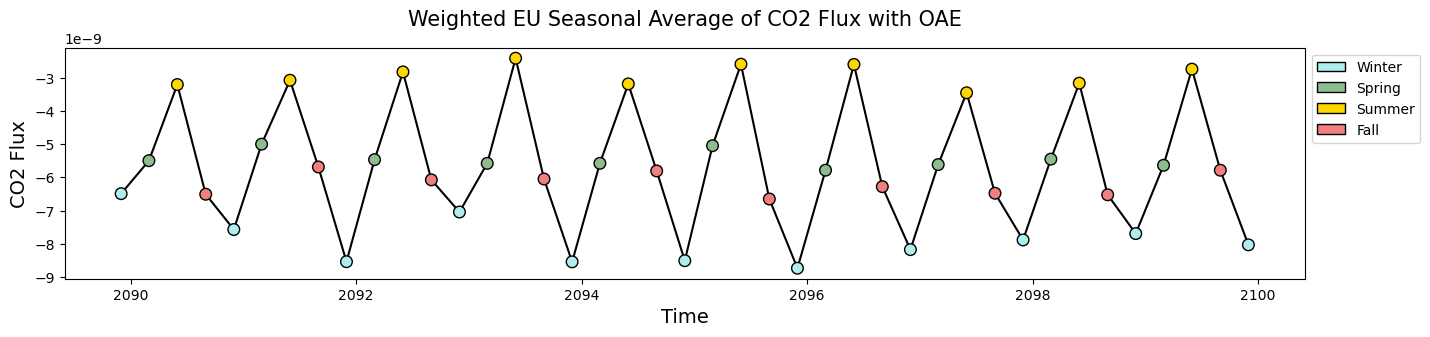

In [48]:
fig, ax = plt.subplots(figsize=(16, 3))
ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux with OAE", fontsize=15, y=1.06)

Text(0.5, 1.06, 'Weighted EU Seasonal Average of CO2 Flux')

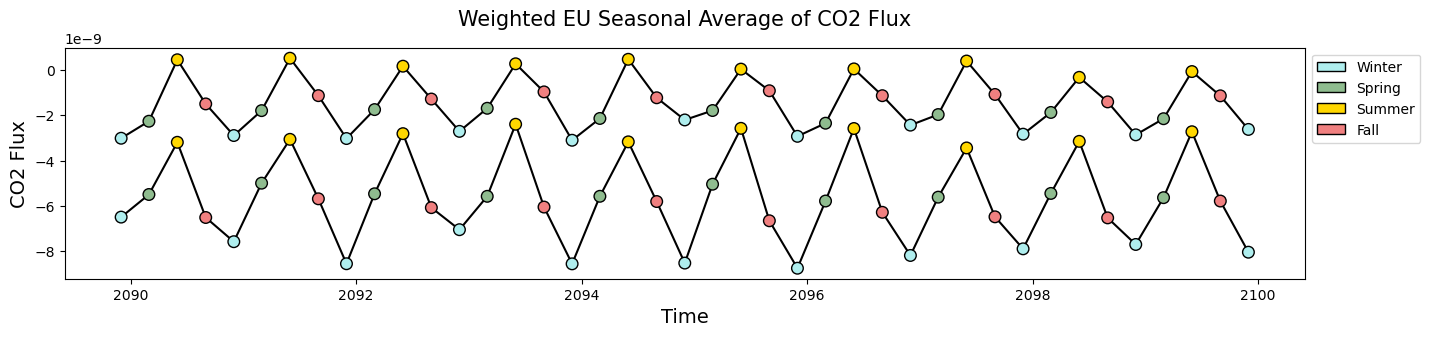

In [38]:
colors = dict(zip(co2flux_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(16, 3))

ax.plot_date(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, '-', color="black", zorder=1)
ax.scatter(co2flux_weighted_baseline.index, co2flux_weighted_baseline.CO2_Flux, color=co2flux_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', s=70)

ax.plot_date(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, '-', color="black", zorder=1)
ax.scatter(co2flux_weighted_oae.index, co2flux_weighted_oae.CO2_Flux, color=co2flux_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best')
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('CO2 Flux', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of CO2 Flux", fontsize=15, y=1.06)